# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [16]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [17]:
# 데이터 로드
data = pd.read_csv("abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [18]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [19]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=100)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [20]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [21]:
#릿지모델 생성 및 훈련
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)

#예측값 구하기
y_pred = ridge.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_pred_age = y_pred + 1.5

#MSE와 RMSE구하기
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)

print('MSE:{0:.3f}, RMSE:{1:.3f}'.format(mse, rmse))

MSE:4.928, RMSE:2.220


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [22]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [23]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    ridge = Ridge(alpha=alpha)

  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring="neg_mean_squared_error",cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpah {0} 일때 5folds의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpah 0 일때 5folds의 평균 RMSE : 2.202
alpah 0.1 일때 5folds의 평균 RMSE : 2.199
alpah 1 일때 5folds의 평균 RMSE : 2.204
alpah 10 일때 5folds의 평균 RMSE : 2.348
alpah 100 일때 5folds의 평균 RMSE : 2.614


alpha가 1일때 모델 성능이 가장 좋다.

## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [24]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [25]:
#모델 생성 및 훈련
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

#예측값 구하기
y_pred = xgb.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_pred_age = y_pred + 1.5

#MSE와 RMSE 구하기
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)

print('MSE:{0:.3f}, RMSE:{1:.3f}'.format(mse, rmse))

MSE:5.480, RMSE:2.341


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

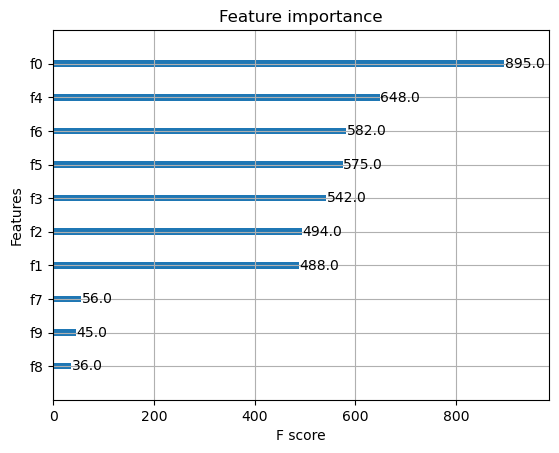

In [26]:
import seaborn as sns
%matplotlib inline

from xgboost import plot_importance
plot_importance(xgb)

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [27]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [28]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [29]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape
y_train.shape

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [31]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)

LogisticRegression()

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [38]:
#기울기
lr_clf.coef_

array([[-1.99751201e-01,  3.65450668e-01,  1.49472159e-01,
        -1.88027158e-01, -2.28495439e-02,  1.95456544e-01,
         4.66701403e-01, -1.66796703e-02,  8.23897356e-02,
         6.75011798e-02, -1.92621898e-02,  2.94915837e-01,
         7.42523715e-03],
       [ 5.96475965e-01, -7.88672850e-01, -1.26181473e-01,
         2.12254610e-01, -1.13504660e-02,  3.15786006e-01,
         3.55148083e-01,  3.34675650e-02,  2.79035751e-01,
        -1.17202511e+00,  2.61165753e-01,  4.64731680e-01,
        -8.33633279e-03],
       [-3.96724764e-01,  4.23222182e-01, -2.32906867e-02,
        -2.42274523e-02,  3.42000099e-02, -5.11242550e-01,
        -8.21849487e-01, -1.67878947e-02, -3.61425486e-01,
         1.10452393e+00, -2.41903563e-01, -7.59647518e-01,
         9.11095638e-04]])

In [39]:
#절편
lr_clf.intercept_

array([-0.04177838,  0.09551048, -0.0537321 ])

3-3) 모델의 정확도를 구하세요.

In [37]:
#모델의 예측값 구하기
lr_pred = lr_clf.predict(x_test)

#모델의 정확도 구하기
from sklearn.metrics import accuracy_score
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_pred)))

accuracy: 0.963
